### Exploratory Data Analysis (EDA) techniques are be applied to understand the data, uncover patterns, and identify relationships

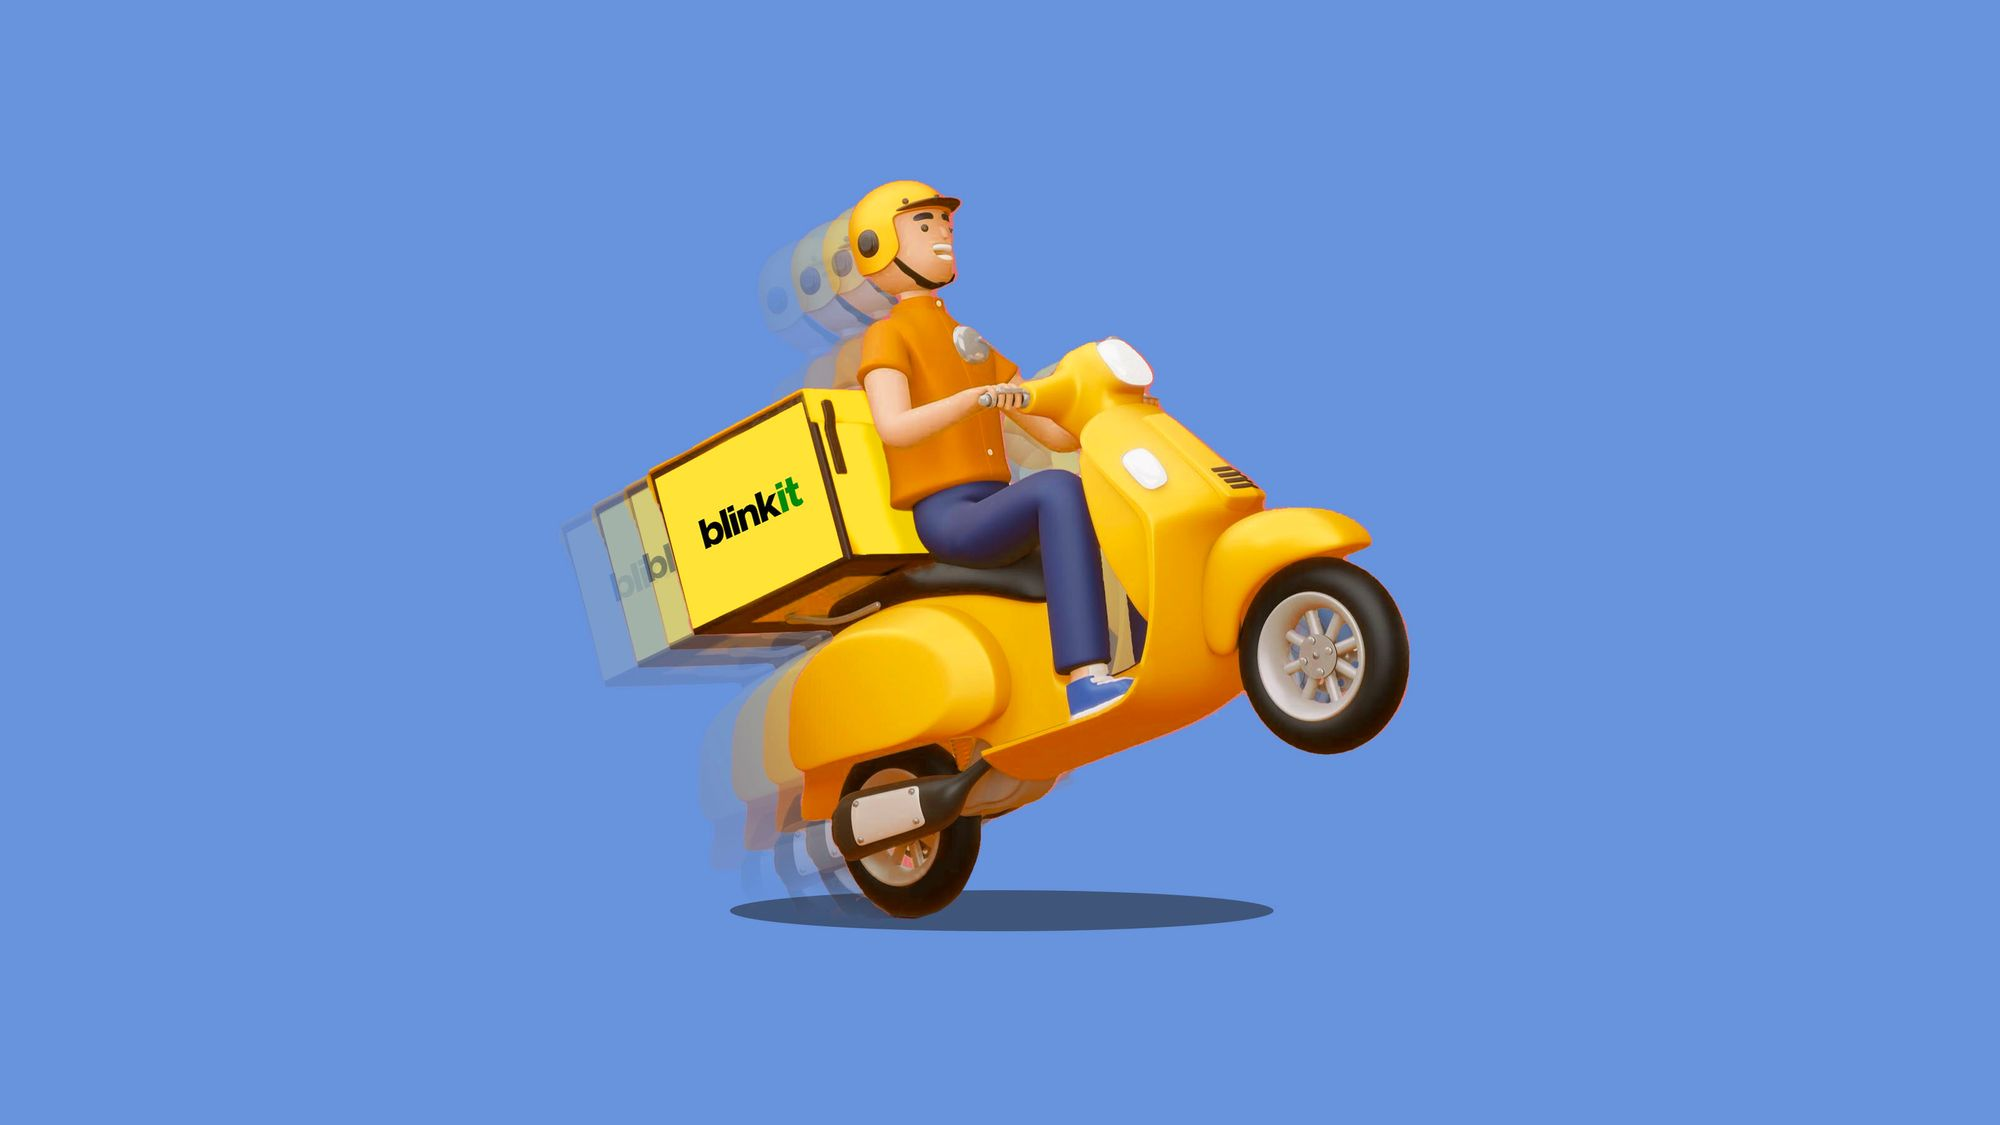

In [1]:
from IPython.display import Image
Image(filename = "blinkit_img.jpg", width=500, height=200)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [3]:
blink = pd.read_excel("blikit_data.xlsx")
blink.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6648,FDX44,9.30,Low Fat,0.043033,Fruits and Vegetables,89.4172,OUT049,1999,Medium,Tier 1,Supermarket Type1,1159.8236
2438,FDI10,8.51,reg,0.078339,Snack Foods,172.9422,OUT013,1987,High,Tier 3,Supermarket Type1,1379.5376
5520,FDU45,15.60,Regular,0.035506,Snack Foods,112.4518,OUT046,1997,Small,Tier 1,Supermarket Type1,3301.7022
4235,FDT02,12.60,Low Fat,0.024190,Dairy,34.4874,OUT035,2004,Small,Tier 2,Supermarket Type1,494.0236
6675,FDP03,5.15,Regular,0.061126,Meat,122.5388,OUT013,1987,High,Tier 3,Supermarket Type1,371.5164


In [4]:
blink.shape

(8523, 12)

In [5]:
blink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Dealing with Blanks

In [6]:
blink.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
meanW = blink['Item_Weight'].mean()
rm = f"{meanW:.3f}"
rm = float(rm)
rm

12.858

In [8]:
blink['Item_Weight'].fillna(rm,inplace=True)

In [9]:
mode = blink['Outlet_Size'].mode()
print(mode[0])
mode

Medium


0    Medium
Name: Outlet_Size, dtype: object

In [10]:
blink['Outlet_Size'].fillna(mode[0],inplace = True)

In [11]:
blink.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Replacing to Low Fat and Regular 

In [12]:
blink['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
rep = {
        'low fat': 'Low Fat',
        'LF':'Low Fat',
        'reg' : 'Regular',
        'Low Fat':'Low Fat',
        'Regular':'Regular'
    }
blink['Item_Fat_Content'] = blink['Item_Fat_Content'].replace(rep)

In [14]:
blink['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

# Fat Content Items

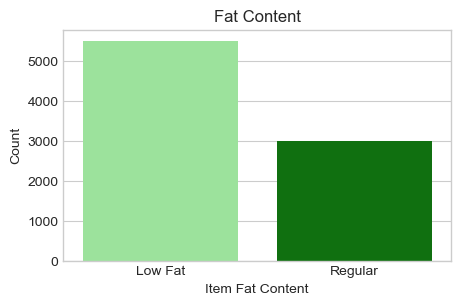

In [15]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(5,3))
sns.countplot(x = 'Item_Fat_Content',data = blink,palette=['lightgreen','green'])
plt.title("Fat Content")
plt.xlabel("Item Fat Content")
plt.ylabel("Count")
plt.show()

<b>ANALYSIS 1: </b> There are so many food items with Low Fat Content listed in BLINKIT!

#### Lets look into pie Chart

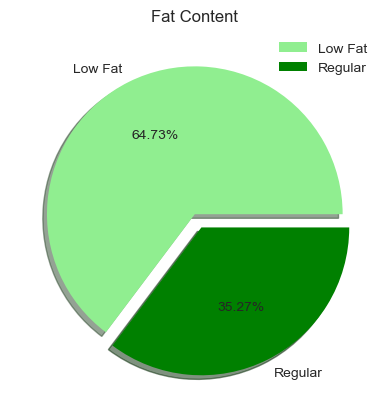

In [16]:
plt.pie(blink['Item_Fat_Content'].value_counts().values,
        labels = blink['Item_Fat_Content'].value_counts().index,
        explode=[0.0,0.1],
       autopct = '%.2f%%',
        shadow = True,
       colors = ['lightgreen','green'])
plt.title("Fat Content")
plt.legend()
plt.show()

<b>ANALYSIS 2: </b> Food items 64.73% with Low Fat listed in BLINKIT!

# Cities with Outlet Size

In [17]:
blink['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [18]:
blink['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [19]:
blink['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [20]:
table = pd.crosstab(index = blink['Outlet_Location_Type'],columns = blink['Outlet_Size'],margins = True)
table

Outlet_Size,High,Medium,Small,All
Outlet_Location_Type,,,,
Tier 1,0,930,1458,2388
Tier 2,0,1855,930,2785
Tier 3,932,2418,0,3350
All,932,5203,2388,8523


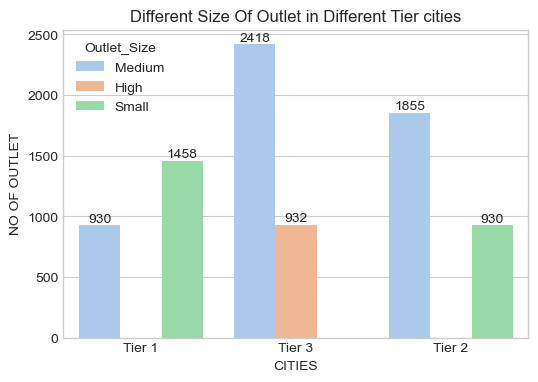

In [21]:
plt.figure(figsize=(6,4))
p = sns.countplot(x ='Outlet_Location_Type',data = blink,hue='Outlet_Size',palette = "pastel")
plt.title("Different Size Of Outlet in Different Tier cities")
plt.xlabel("CITIES")
plt.ylabel("NO OF OUTLET")
for i in p.containers:
    p.bar_label(i)

<b>ANALYSIS 3: </b> 

Tier 1 City = No <b>Large(high)</b> size Outlets but <b>high number of Small</b> size Outlets

Tier 2 City = No <b>Small</b> size Outlets but <b> high number of Medium</b> size Outlets

Tier 3 City = No <b>Large(high)</b> size Outlets but <b>high number of Medium</b> size Outlets

# Different Tier cities Establishement of BLINKIT!  

In [22]:
blink['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [23]:
table2 = pd.crosstab(index = blink['Outlet_Establishment_Year'],columns = blink['Outlet_Location_Type'],margins = True)
table2

Outlet_Location_Type,Tier 1,Tier 2,Tier 3,All
Outlet_Establishment_Year,,,,
1985,528,0,935,1463
1987,0,0,932,932
1997,930,0,0,930
1998,0,0,555,555
1999,930,0,0,930
2002,0,929,0,929
2004,0,930,0,930
2007,0,926,0,926
2009,0,0,928,928


In [24]:
table2["All"]

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
All     8523
Name: All, dtype: int64

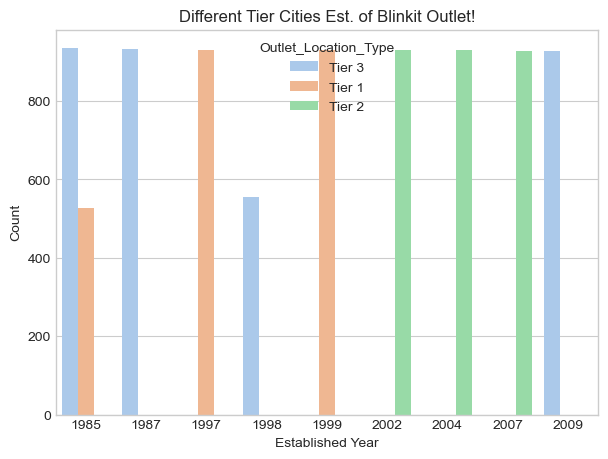

In [25]:
plt.figure(figsize= (7,5))
sns.countplot(x = 'Outlet_Establishment_Year',data = blink,hue = 'Outlet_Location_Type',palette = 'pastel')
plt.title("Different Tier Cities Est. of Blinkit Outlet!")
plt.xlabel("Established Year")
plt.ylabel("Count")
plt.show()

In [26]:
diff_yr = blink[['Outlet_Establishment_Year','Outlet_Location_Type']]
diff_yr = diff_yr.rename(columns={'Outlet_Establishment_Year':'Est Year','Outlet_Location_Type':'Total Outlets'})
diff_yr.sample(5)

,Est Year,Total Outlets
6327,1998,Tier 3
3817,2007,Tier 2
1791,1985,Tier 1
4043,1985,Tier 1
4087,1999,Tier 1


In [27]:
df_yr = diff_yr.groupby("Est Year")['Total Outlets'].count().reset_index()
df_yr

,Est Year,Total Outlets
0,1985,1463
1,1987,932
2,1997,930
3,1998,555
4,1999,930
5,2002,929
6,2004,930
7,2007,926
8,2009,928


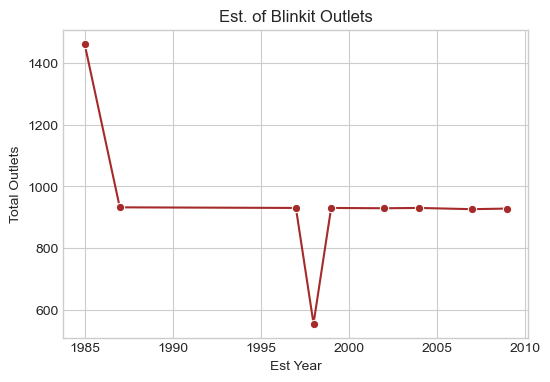

In [28]:
plt.figure(figsize=(6,4))
sns.lineplot(x = 'Est Year',y = 'Total Outlets',data = df_yr,color = "brown",marker = 'o')
plt.title("Est. of Blinkit Outlets")
plt.show()

<b>ANALYSIS 4: </b> 

During establish at 1985 till 2009 it has been decreased the number of Outlet.  

# Sales Analysis according to Establishment year

In [29]:
sales = blink[['Outlet_Establishment_Year','Item_Outlet_Sales']]
sales = sales.rename(columns={'Outlet_Establishment_Year':'EST Year','Item_Outlet_Sales':'Sale'})
sales

,EST Year,Sale
0,1999,3735.1380
1,2009,443.4228
2,1999,2097.2700
3,1998,732.3800
4,1987,994.7052
...,...,...
8518,1987,2778.3834
8519,2002,549.2850
8520,2004,1193.1136
8521,2009,1845.5976


In [30]:
sales_df = sales.groupby('EST Year')['Sale'].sum().reset_index()
sales_df

,EST Year,Sale
0,1985,3.633620e+06
1,1987,2.142664e+06
2,1997,2.118395e+06
3,1998,1.883402e+05
4,1999,2.183970e+06
5,2002,2.036725e+06
6,2004,2.268123e+06
7,2007,2.167465e+06
8,2009,1.851823e+06


In [31]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EST Year  9 non-null      int64  
 1   Sale      9 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 276.0 bytes


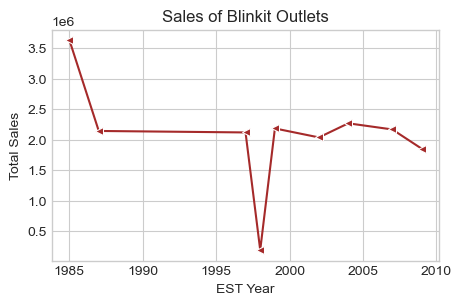

In [32]:
plt.figure(figsize=(5,3))
sns.lineplot(x = 'EST Year',y = 'Sale',data = sales_df,color='brown',marker='<')
plt.title("Sales of Blinkit Outlets")
plt.ylabel('Total Sales')
plt.show()

<b>ANALYSIS 5: </b> Sales at 1985 is Maximum and  in 1995 its Minimum 

It's showing downfall Again in 2009

# Sales according to Outlet type

In [33]:
blink['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [34]:
t4 = blink[['Outlet_Type','Item_Outlet_Sales']]
t4 = t4.rename(columns = {'Outlet_Type':'Outlet Type','Item_Outlet_Sales':'Sales'})
t4

,Outlet Type,Sales
0,Supermarket Type1,3735.1380
1,Supermarket Type2,443.4228
2,Supermarket Type1,2097.2700
3,Grocery Store,732.3800
4,Supermarket Type1,994.7052
...,...,...
8518,Supermarket Type1,2778.3834
8519,Supermarket Type1,549.2850
8520,Supermarket Type1,1193.1136
8521,Supermarket Type2,1845.5976


In [35]:
sales_df1 = t4.groupby('Outlet Type')['Sales'].sum().reset_index()
sales_df1

,Outlet Type,Sales
0,Grocery Store,3.680343e+05
1,Supermarket Type1,1.291734e+07
2,Supermarket Type2,1.851823e+06
3,Supermarket Type3,3.453926e+06


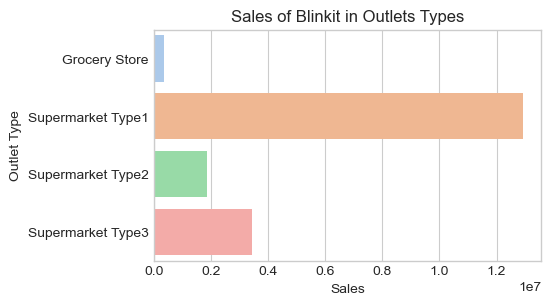

In [36]:
plt.figure(figsize=(5,3))
sns.barplot(y = "Outlet Type",x="Sales",data = sales_df1,palette='pastel')
plt.title("Sales of Blinkit in Outlets Types")
plt.show()

<b>ANALYSIS 6:</b>  

1 . As we can see in above bar Graph<b> Grocery Stores </b> have <b>very less sales</b> 

2 . As we can see in above bar Graph<b> SuperMarket Type1 </b> have <b>very High sales</b> 

In [37]:
t4.sample(5)

,Outlet Type,Sales
5305,Supermarket Type1,2633.9048
8496,Supermarket Type1,3715.1640
3945,Supermarket Type3,4124.6310
7637,Supermarket Type1,1366.2216
6979,Grocery Store,79.8960


<Axes: xlabel='Sales', ylabel='Outlet Type'>

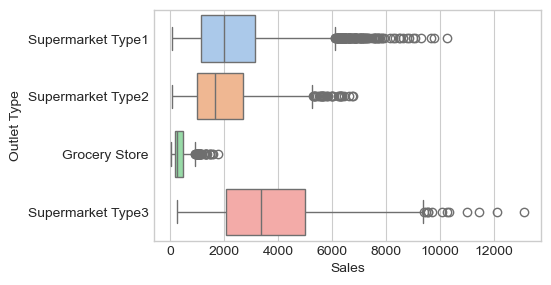

In [38]:
plt.figure(figsize=(5,3))
sns.boxplot(y = 'Outlet Type' ,x = 'Sales',data = t4,palette='pastel')

#### Potential Outliers and Median Of Outlet Types on Sales

In [39]:
s = t4[t4['Outlet Type']=='Supermarket Type1']
med = s['Sales'].median()
print("Median of Sales of Supermarket Type1 :",med)

Median of Sales of Supermarket Type1 : 1990.742


In [40]:
min_th = s['Sales'].quantile(0.05)
max_th = s['Sales'].quantile(0.95)
pO_s1 = s[ (s['Sales']>max_th) | (s['Sales']<min_th) ]
print(pO_s1.sample(5),'\n')
print(f"So There are {pO_s1.shape[0]} potential Outliers in Supermarket Type1")

            Outlet Type      Sales
8312  Supermarket Type1  5849.7188
8039  Supermarket Type1  8994.9580
6321  Supermarket Type1   413.4618
5677  Supermarket Type1  6088.0752
256   Supermarket Type1   259.6620 

So There are 558 potential Outliers in Supermarket Type1


In [41]:
s = t4[t4['Outlet Type']=='Supermarket Type2']
med = s['Sales'].median()
print("Median of Sales of Supermarket Type2 :",med)

Median of Sales of Supermarket Type2 : 1655.1788


In [42]:
min_th = s['Sales'].quantile(0.05)
max_th = s['Sales'].quantile(0.95)
pO_s1 = s[ (s['Sales']>max_th) | (s['Sales']<min_th) ]
print(pO_s1.sample(5),'\n')
print(f"So There are {pO_s1.shape[0]} potential Outliers in Supermarket Type2")

            Outlet Type      Sales
7403  Supermarket Type2   183.7608
55    Supermarket Type2  6258.5200
5130  Supermarket Type2  5084.0488
1543  Supermarket Type2    78.5644
641   Supermarket Type2  6611.3940 

So There are 94 potential Outliers in Supermarket Type2


In [43]:
s = t4[t4['Outlet Type']=='Supermarket Type3']
med = s['Sales'].median()
print("Median of Sales of Supermarket Type3 :",med)

Median of Sales of Supermarket Type3 : 3364.9532


In [44]:
min_th = s['Sales'].quantile(0.05)
max_th = s['Sales'].quantile(0.95)
pO_s1 = s[ (s['Sales']>max_th) | (s['Sales']<min_th) ]
print(pO_s1.sample(5),'\n')
print(f"So There are {pO_s1.shape[0]} potential Outliers in Supermarket Type3")

            Outlet Type       Sales
2518  Supermarket Type3    713.0718
7690  Supermarket Type3   7943.6598
7930  Supermarket Type3   9227.9880
1009  Supermarket Type3  10236.6750
388   Supermarket Type3    717.7324 

So There are 94 potential Outliers in Supermarket Type3


In [45]:
s = t4[t4['Outlet Type']=='Grocery Store']
med = s['Sales'].median()
print("Median of Sales of Groceries :",med)

Median of Sales of Groceries : 256.9988


In [46]:
min_th = s['Sales'].quantile(0.05)
max_th = s['Sales'].quantile(0.95)
pO_s1 = s[ (s['Sales']>max_th) | (s['Sales']<min_th) ]
print(pO_s1.sample(5),'\n')
print(f"So There are {pO_s1.shape[0]} potential Outliers in Grocery Stores")

        Outlet Type     Sales
828   Grocery Store   58.5904
2055  Grocery Store   37.2848
1824  Grocery Store  992.0420
446   Grocery Store   50.6008
3227  Grocery Store  985.3840 

So There are 110 potential Outliers in Grocery Stores


# Sales According to Location type

In [47]:
blink['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [48]:
t5 = blink[['Outlet_Location_Type','Item_Outlet_Sales']]
t5 = t5.rename(columns ={'Outlet_Location_Type':'Location Type','Item_Outlet_Sales':'Sales'})

In [49]:
sales_df2=t5.groupby('Location Type')['Sales'].sum().reset_index()
sales_df2

,Location Type,Sales
0,Tier 1,4.482059e+06
1,Tier 2,6.472314e+06
2,Tier 3,7.636753e+06


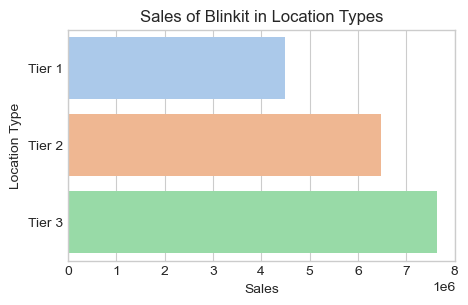

In [50]:
plt.figure(figsize=(5,3))
sns.barplot(y = "Location Type",x="Sales",data = sales_df2,palette='pastel')
plt.title("Sales of Blinkit in Location Types")
plt.show()

<b>ANALYSIS 7:</b> 

1. <b>Tier 1</b> Location has <b>very less sales </b>    

2. <b>Tier 3</b> Location has <b>very high sales </b>    

In [51]:
t5.sample(4)

,Location Type,Sales
823,Tier 3,1856.2504
2710,Tier 2,2816.3340
671,Tier 3,1534.0032
203,Tier 3,6704.6060


<Axes: xlabel='Sales', ylabel='Location Type'>

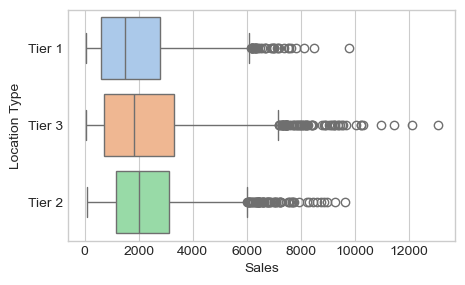

In [52]:
plt.figure(figsize=(5,3))
sns.boxplot(x = 'Sales',y = 'Location Type',data = t5,palette = 'pastel')

#### Potential Outliers and Median Of Loction Types on Sales

In [53]:
s = t5[t5['Location Type']=='Tier 1']
med = s['Sales'].median()
print("Median of Sales of Tier 1 Location :",med)

Median of Sales of Tier 1 Location : 1487.3971999999999


In [54]:
min_th = s['Sales'].quantile(0.05)
max_th = s['Sales'].quantile(0.95)
pO_s1 = s[ (s['Sales']>max_th) | (s['Sales']<min_th) ]
print(pO_s1.sample(5),'\n')
print(f"So There are {pO_s1.shape[0]} potential Outliers in Tier 1 Location")

     Location Type      Sales
5584        Tier 1  5077.3908
903         Tier 1  6331.7580
6932        Tier 1  6308.4550
6560        Tier 1  5841.0634
1458        Tier 1  5954.9152 

So There are 240 potential Outliers in Tier 1 Location


In [55]:
s = t5[t5['Location Type']=='Tier 2']
med = s['Sales'].median()
print("Median of Sales of Tier 2 Location :",med)

Median of Sales of Tier 2 Location : 2004.058


In [56]:
min_th = s['Sales'].quantile(0.05)
max_th = s['Sales'].quantile(0.95)
pO_s1 = s[ (s['Sales']>max_th) | (s['Sales']<min_th) ]
print(pO_s1.sample(5),'\n')
print(f"So There are {pO_s1.shape[0]} potential Outliers in Tier 2 Location")

     Location Type      Sales
4775        Tier 2  5896.3248
1059        Tier 2  5712.5640
1230        Tier 2   372.8480
7561        Tier 2   388.1614
6884        Tier 2  5816.4288 

So There are 280 potential Outliers in Tier 2 Location


In [57]:
s = t5[t5['Location Type']=='Tier 3']
med = s['Sales'].median()
print("Median of Sales of Tier 3 Location :",med)

Median of Sales of Tier 3 Location : 1812.3076


In [58]:
min_th = s['Sales'].quantile(0.05)
max_th = s['Sales'].quantile(0.95)
pO_s1 = s[ (s['Sales']>max_th) | (s['Sales']<min_th) ]
print(pO_s1.sample(5),'\n')
print(f"So There are {pO_s1.shape[0]} potential Outliers in Tier 3 Location")

     Location Type      Sales
7148        Tier 3    82.5592
1291        Tier 3   161.7894
3321        Tier 3  6391.6800
3163        Tier 3    63.2510
2887        Tier 3  6359.7216 

So There are 336 potential Outliers in Tier 3 Location


# Sales According to Outlet Size

In [59]:
blink['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [60]:
t6 = blink[['Outlet_Size','Item_Outlet_Sales']]
t6 = t6.rename(columns={'Outlet_Size':'Outlet Size','Item_Outlet_Sales':'Sales'})

In [61]:
sales_df3 = t6.groupby('Outlet Size')['Sales'].sum().reset_index()
sales_df3

,Outlet Size,Sales
0,High,2.142664e+06
1,Medium,1.188225e+07
2,Small,4.566212e+06


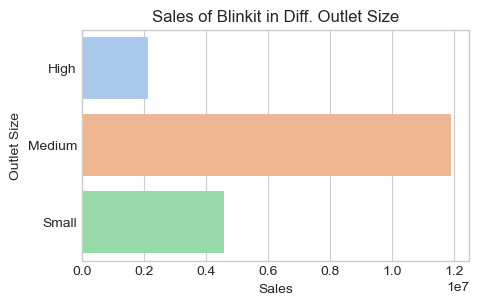

In [62]:
plt.figure(figsize=(5,3))
sns.barplot(y= "Outlet Size",x="Sales",data = sales_df3,palette='pastel')
plt.title("Sales of Blinkit in Diff. Outlet Size")
plt.show()

<b>ANALYSIS 8:</b> 

1.<b>Medium outlet Size</b> has <b>very high sales</b>

1.<b>Large(High) outlet Size</b> has <b>very low sales</b>

In [63]:
t6.sample(4)

,Outlet Size,Sales
5019,Medium,3848.3240
2032,High,3779.0808
6560,Small,5841.0634
204,Small,4119.9704


<Axes: xlabel='Sales', ylabel='Outlet Size'>

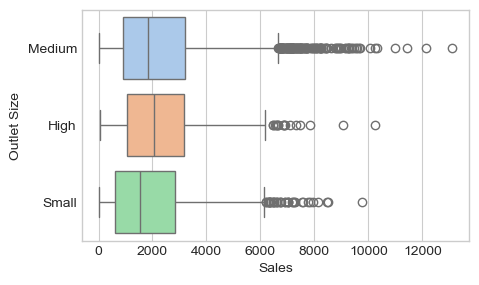

In [64]:
plt.figure(figsize=(5,3))
sns.boxplot(x = 'Sales',y = 'Outlet Size',data = t6,palette = 'pastel')

#### Potential Outliers and Median Of Outlet Size on Sales

In [65]:
s = t6[t6['Outlet Size']=='Small']
med = s['Sales'].median()
print("Median of Sales of Small Size outlets :",med)

Median of Sales of Small Size outlets : 1544.656


In [66]:
min_th = s['Sales'].quantile(0.05)
max_th = s['Sales'].quantile(0.95)
pO_s1 = s[ (s['Sales']>max_th) | (s['Sales']<min_th) ]
print(pO_s1.sample(5),'\n')
print(f"So There are {pO_s1.shape[0]} potential Outliers in Small Size outlets")

     Outlet Size      Sales
4415       Small  5219.8720
3053       Small    34.6216
6540       Small  5742.5250
6262       Small   141.8154
302        Small  5895.6590 

So There are 239 potential Outliers in Small Size outlets


In [67]:
s = t6[t6['Outlet Size']=='Medium']
med = s['Sales'].median()
print("Median of Sales of Medium Size outlets :",med)

Median of Sales of Medium Size outlets : 1850.924


In [68]:
min_th = s['Sales'].quantile(0.05)
max_th = s['Sales'].quantile(0.95)
pO_s1 = s[ (s['Sales']>max_th) | (s['Sales']<min_th) ]
print(pO_s1.sample(5),'\n')
print(f"So There are {pO_s1.shape[0]} potential Outliers in Medium Size outlets")

     Outlet Size      Sales
5982      Medium   194.4136
5550      Medium  7602.1044
6592      Medium   170.4448
6674      Medium   125.8362
8036      Medium  5926.2858 

So There are 521 potential Outliers in Medium Size outlets


In [69]:
s = t6[t6['Outlet Size']=='High']
med = s['Sales'].median()
print("Median of Sales of Large Size outlets :",med)

Median of Sales of Large Size outlets : 2050.664


In [70]:
min_th = s['Sales'].quantile(0.05)
max_th = s['Sales'].quantile(0.95)
pO_s1 = s[ (s['Sales']>max_th) | (s['Sales']<min_th) ]
print(pO_s1.sample(5),'\n')
print(f"So There are {pO_s1.shape[0]} potential Outliers in Large Size outlets")

     Outlet Size      Sales
520         High   303.6048
818         High   322.2472
3087        High  7843.1240
1835        High  6615.3888
1667        High  5608.6992 

So There are 94 potential Outliers in Large Size outlets


# Sales of Fat Content Foods

In [71]:
blink['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [72]:
t7 = blink[['Item_Fat_Content','Item_Outlet_Sales']]
t7 = t7.rename(columns={'Item_Fat_Content':'Fat Content','Item_Outlet_Sales':'Sales'})

In [73]:
sales_df4 = t7.groupby('Fat Content')['Sales'].sum().reset_index()
sales_df4

,Fat Content,Sales
0,Low Fat,1.190409e+07
1,Regular,6.687031e+06


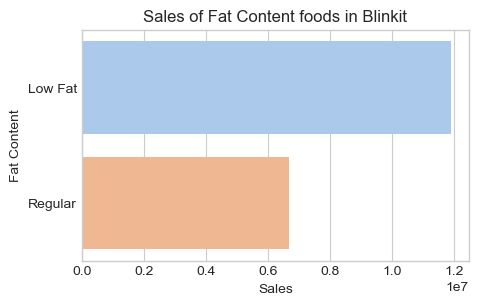

In [74]:
plt.figure(figsize=(5,3))
sns.barplot(y= "Fat Content",x="Sales",data = sales_df4,palette='pastel')
plt.title("Sales of Fat Content foods in Blinkit")
plt.show()

<b>ANALYSIS 9:</b> Sales of foods with <b>Low Fat</b> has <b>High Sales </b>

In [75]:
t7.sample(4)

,Fat Content,Sales
4407,Regular,587.2356
5703,Low Fat,1211.7560
7653,Regular,1362.2268
1252,Low Fat,189.0872


<Axes: xlabel='Sales', ylabel='Fat Content'>

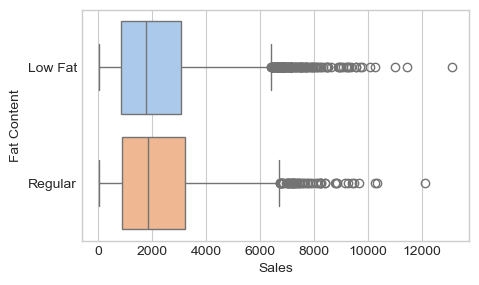

In [76]:
plt.figure(figsize=(5,3))
sns.boxplot(x = 'Sales',y = 'Fat Content',data = t7,palette = 'pastel')

#### Potential Outliers and Median Of Fat Content on Sales

In [77]:
s = t7[t7['Fat Content']=='Low Fat']
med = s['Sales'].median()
print("Median of Sales of Low Fat foods:",med)

Median of Sales of Low Fat foods: 1765.0358


In [78]:
min_th = s['Sales'].quantile(0.05)
max_th = s['Sales'].quantile(0.95)
pO_s1 = s[ (s['Sales']>max_th) | (s['Sales']<min_th) ]
print(pO_s1.sample(5),'\n')
print(f"So There are {pO_s1.shape[0]} potential Outliers in Low Fat foods")

     Fat Content      Sales
5322     Low Fat  6096.0648
2337     Low Fat    61.2536
4959     Low Fat   111.8544
4861     Low Fat   113.8518
6189     Low Fat  6371.7060 

So There are 551 potential Outliers in Low Fat foods


In [79]:
s = t7[t7['Fat Content']=='Regular']
med = s['Sales'].median()
print("Median of Sales of Regular Fat foods:",med)

Median of Sales of Regular Fat foods: 1844.5989


In [80]:
min_th = s['Sales'].quantile(0.05)
max_th = s['Sales'].quantile(0.95)
pO_s1 = s[ (s['Sales']>max_th) | (s['Sales']<min_th) ]
print(pO_s1.sample(5),'\n')
print(f"So There are {pO_s1.shape[0]} potential Outliers in Regular Fat foods")

     Fat Content      Sales
5148     Regular   123.8388
4378     Regular  6478.2340
6208     Regular   183.7608
2803     Regular  6729.9064
5042     Regular  5992.2000 

So There are 298 potential Outliers in Regular Fat foods


#  Sales of Types of Items in BlinkIt

In [81]:
blink['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [82]:
blink['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

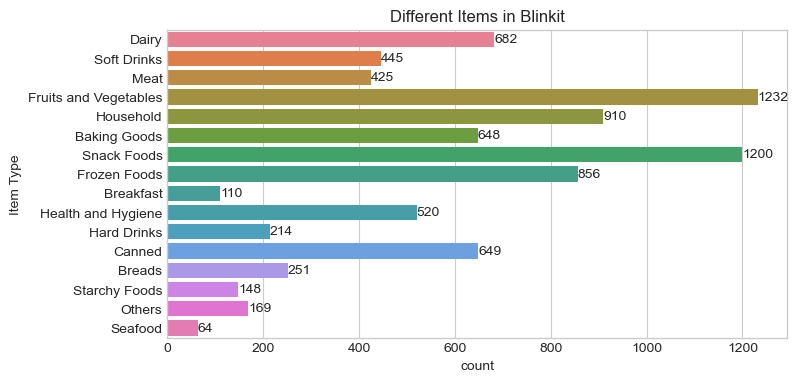

In [83]:
plt.figure(figsize=(8,4))
p = sns.countplot(y = 'Item_Type',data = blink,hue = 'Item_Type')
plt.title('Different Items in Blinkit')
plt.ylabel('Item Type')
for i in p.containers:
    p.bar_label(i)

In [84]:
blink.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,Medium,Tier 3,Grocery Store,431.4384
8446,FDT04,17.250,Low Fat,0.107259,Frozen Foods,40.1822,OUT045,2002,Medium,Tier 2,Supermarket Type1,510.6686
2446,NCA06,12.858,Low Fat,0.142590,Household,35.9190,OUT027,1985,Medium,Tier 3,Supermarket Type3,585.9040
2992,NCL07,13.850,Low Fat,0.031339,Others,41.0480,OUT046,1997,Small,Tier 1,Supermarket Type1,639.1680


In [85]:
t8 = blink[['Item_Type','Item_Outlet_Sales']]
t8 = t8.rename(columns={'Item_Type':'Item Type','Item_Outlet_Sales':'Sales'})
t8.sample(3)

,Item Type,Sales
3798,Household,2805.0154
2818,Baking Goods,263.6568
8475,Health and Hygiene,378.1744


In [86]:
sales_df5 = t8.groupby('Item Type')['Sales'].sum().reset_index()
sales_df5

,Item Type,Sales
0,Baking Goods,1.265525e+06
1,Breads,5.532372e+05
2,Breakfast,2.322990e+05
3,Canned,1.444151e+06
4,Dairy,1.522594e+06
5,Frozen Foods,1.825735e+06
6,Fruits and Vegetables,2.820060e+06
7,Hard Drinks,4.577934e+05
8,Health and Hygiene,1.045200e+06
9,Household,2.055494e+06


Text(0.5, 1.0, 'Sales of different Items on BinkIt ')

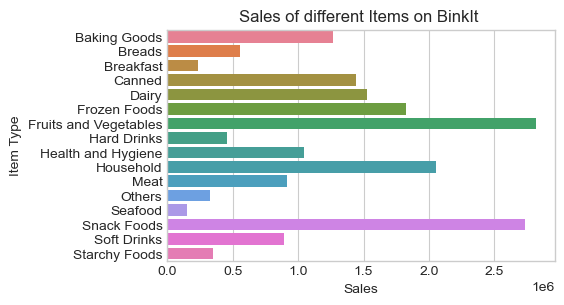

In [87]:
plt.figure(figsize=(5,3))
sns.barplot(x = 'Sales',y = 'Item Type',data = sales_df5,hue = 'Item Type')
plt.title('Sales of different Items on BinkIt ')

<b>ANALYSIS 10:</b> 

Sales of <b> Fruits and Vegetables</b> are <b>very High</b>

Sales of <b> Sea Food </b> are <b>very Low</b>

# Linear or non-linear relationships

In [88]:
blink.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2548,NCL18,18.850,Low Fat,0.167584,Household,194.6136,OUT046,1997,Small,Tier 1,Supermarket Type1,2721.7904
8028,DRE60,9.395,Low Fat,0.160236,Soft Drinks,227.8720,OUT017,2007,Medium,Tier 2,Supermarket Type1,1584.6040
3130,FDY37,17.000,Regular,0.026547,Canned,142.1470,OUT013,1987,High,Tier 3,Supermarket Type1,2147.2050
8089,FDT03,12.858,Low Fat,0.009950,Meat,185.5608,OUT027,1985,Medium,Tier 3,Supermarket Type3,3307.6944


### Item_MRP vs. Item_Outlet_Sales

Text(0, 0.5, 'Item Outlet Sales')

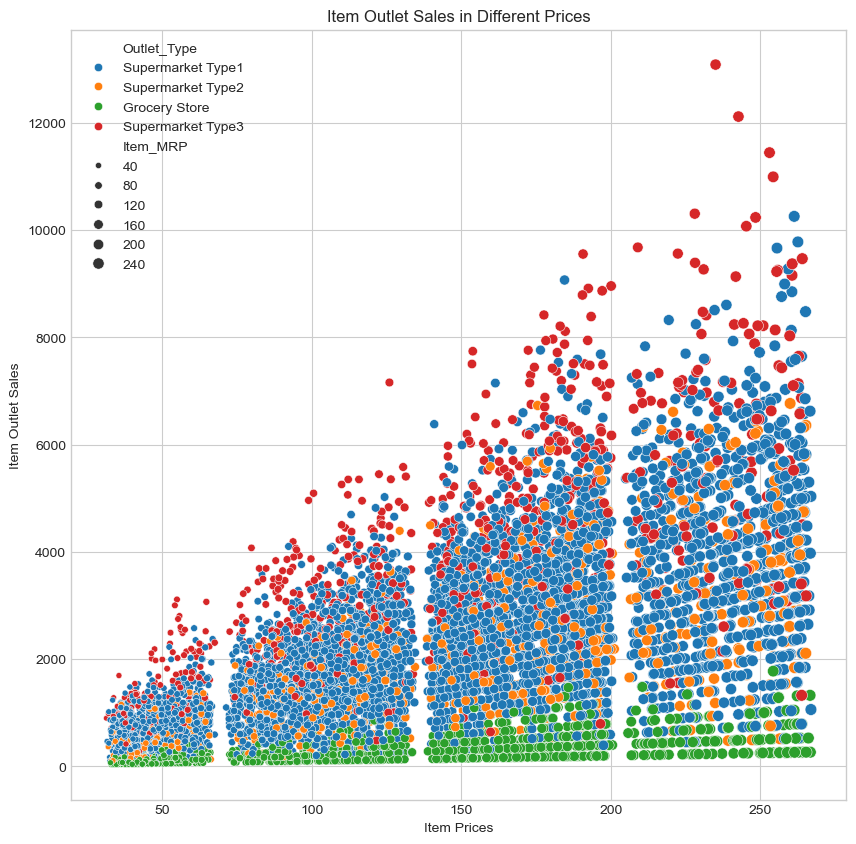

In [89]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = blink,hue = 'Outlet_Type',size = 'Item_MRP')
plt.title('Item Outlet Sales in Different Prices')
plt.xlabel('Item Prices')
plt.ylabel('Item Outlet Sales')

<b>ANALYSIS 11:</b> 

As we can see <b>high Price Item</b> has <b>High Sales </b>

As the price is low the sale is low ,price is high sale is high

So, the <b>relation is Linear</b>

### Item_Visibility vs. Item_Outlet_Sales

Text(0, 0.5, 'Item Outlet Sales')

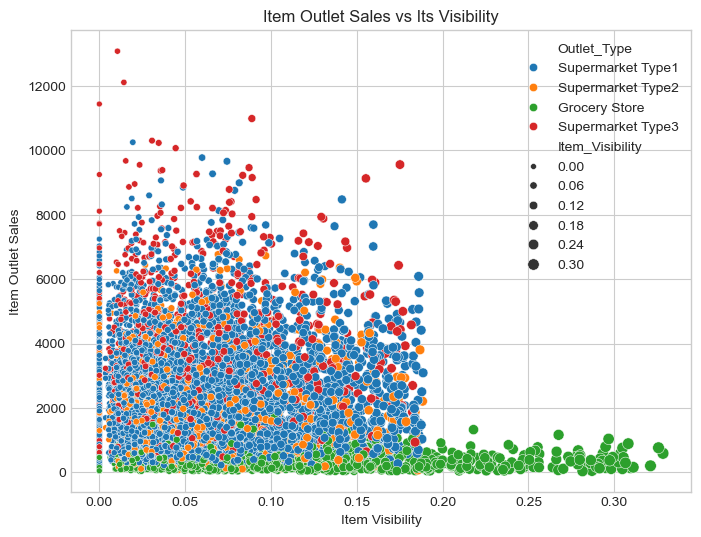

In [90]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Item_Visibility',y = 'Item_Outlet_Sales',data = blink,hue = 'Outlet_Type',size = 'Item_Visibility')
plt.title('Item Outlet Sales vs Its Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')

<b>ANALYSIS 12:</b> 

From the abpve plot we can see <b>low visibility </b> has <b>high Sale</b>   

As the <b>visibility increase</b>  Sales <b>decrease</b>  

So relation Between, <b>visibility</b> and <b>Sales</b> is Linear 

### Item_Weight vs. Item_Outlet_Sales

Text(0, 0.5, 'Item Outlet Sales')

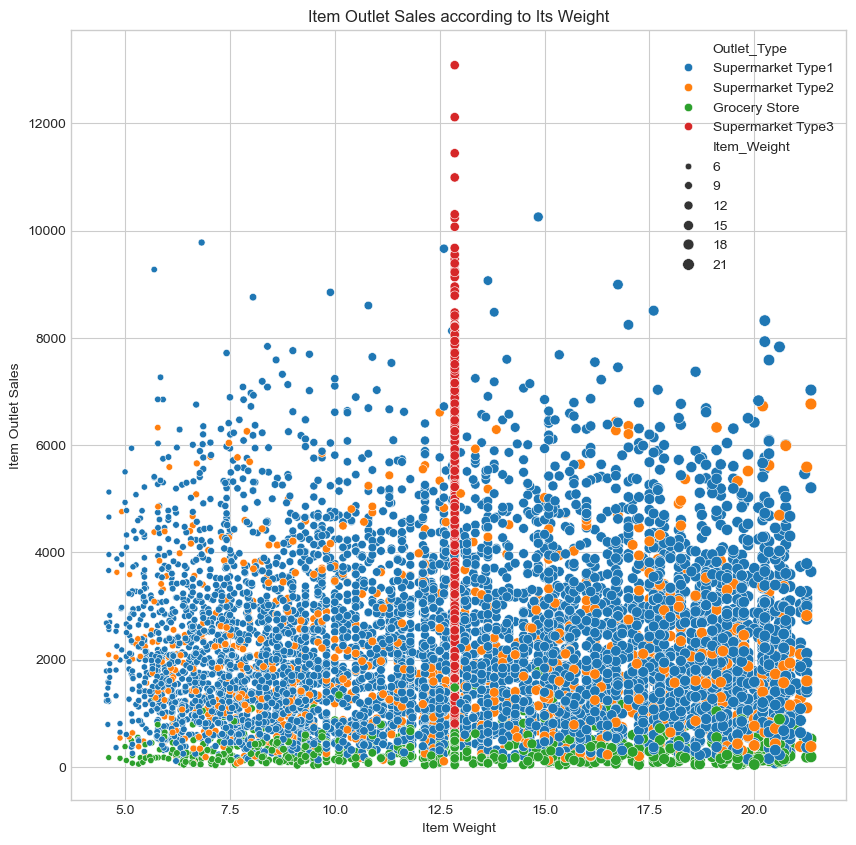

In [91]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = blink,hue = 'Outlet_Type',size = 'Item_Weight')
plt.title('Item Outlet Sales according to Its Weight')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')

<b>ANALYSIS 13:</b> 

As we can se <b>weigth</b> has nothing to do with <b>sales</b>  

So relation Between, <b>weight</b> and <b>Sales</b> is Non-linear 

# Average Sales of Diff. Outlet Type and Outlet Size 

In [92]:
#Average Item_Outlet_Sales by Outlet_Type and Outlet_Size.
pv_t = pd.pivot_table(data = blink,
                   index = 'Outlet_Type',
                   columns = 'Outlet_Size',values='Item_Outlet_Sales',
                  aggfunc = np.mean)
pv_t

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,NaN,339.351662,340.329723
Supermarket Type1,2298.995256,2293.773997,2358.343066
Supermarket Type2,NaN,1995.498739,NaN
Supermarket Type3,NaN,3694.038558,NaN


Text(0, 0.5, 'Average Sales')

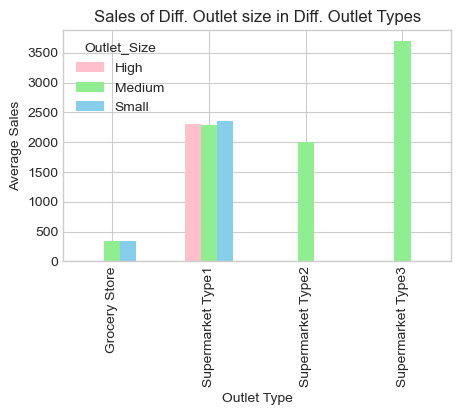

In [93]:
pv_t.plot(kind = 'bar',figsize=(5,3),color = ['pink','lightgreen','skyblue'])
plt.title('Sales of Diff. Outlet size in Diff. Outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Average Sales')

<b>ANALYSIS 14:</b> 

In Grocery Stores, have <b>same average sales </b> of both  <b>Medium</b> and  <b>Small</b> size Outlets and Don't Have the  <b>Large Outlets</b>

In Supermarket Type1, have <b>high average sales </b> of <b>Small</b> size Outlets and have <b> almost same average sales </b> of both  <b>Medium</b> and  <b>Large</b> Outlets

In Supermarket Type2, Don't Have the <b>Large Outlets</b> and <b>Small Outlets</b>

In Supermarket Type3, also Don't Have the <b>Large Outlets</b> and <b>Small Outlets</b>

# Total Sales by Diff. Outlet Location Type and its Fat Content 

In [94]:
blink.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5313,FDM03,12.65,Low Fat,0.000000,Meat,107.8938,OUT046,1997,Small,Tier 1,Supermarket Type1,750.3566
8284,FDB49,8.30,Regular,0.050467,Baking Goods,97.6384,OUT010,1998,Medium,Tier 3,Grocery Store,197.0768
5393,FDT03,21.25,Low Fat,0.010019,Meat,184.6608,OUT045,2002,Medium,Tier 2,Supermarket Type1,367.5216
7722,FDS34,19.35,Regular,0.076745,Snack Foods,113.4518,OUT035,2004,Small,Tier 2,Supermarket Type1,1593.9252


In [95]:
pv_t1  = pd.pivot_table(index = 'Outlet_Location_Type',columns = 'Item_Fat_Content',data = blink,values = 'Item_Outlet_Sales',aggfunc = np.sum)
pv_t1

Item_Fat_Content,Low Fat,Regular
Outlet_Location_Type,,
Tier 1,2.828747e+06,1.653312e+06
Tier 2,4.134787e+06,2.337527e+06
Tier 3,4.940560e+06,2.696192e+06


Text(0, 0.5, 'Total Sales')

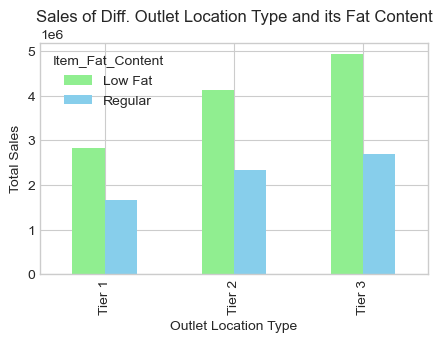

In [96]:
pv_t1.plot(kind = 'bar',figsize=(5,3),color = ['lightgreen','skyblue'])
plt.title('Sales of Diff. Outlet Location Type and its Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')

<b>ANALYSIS 14:</b> 

In <b>Tier 1, Tier 2</b> and <b>Tier 3</b> Location the sales of <b>Low Fat Content</b> food is <b>High</b>    

# Correlation

In [97]:
blink.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6809,FDW55,12.6,Regular,0.021952,Fruits and Vegetables,250.9092,OUT013,1987,High,Tier 3,Supermarket Type1,4731.1748


In [98]:
num_col = blink[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']]
print(num_col)
corr_mat = num_col.corr()
corr_mat

      Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0           9.300         0.016047  249.8092          3735.1380
1           5.920         0.019278   48.2692           443.4228
2          17.500         0.016760  141.6180          2097.2700
3          19.200         0.000000  182.0950           732.3800
4           8.930         0.000000   53.8614           994.7052
...           ...              ...       ...                ...
8518        6.865         0.056783  214.5218          2778.3834
8519        8.380         0.046982  108.1570           549.2850
8520       10.600         0.035186   85.1224          1193.1136
8521        7.210         0.145221  103.1332          1845.5976
8522       14.800         0.044878   75.4670           765.6700

[8523 rows x 4 columns]


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.012046,0.024756,0.011553
Item_Visibility,-0.012046,1.000000,-0.001315,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.011553,-0.128625,0.567574,1.000000


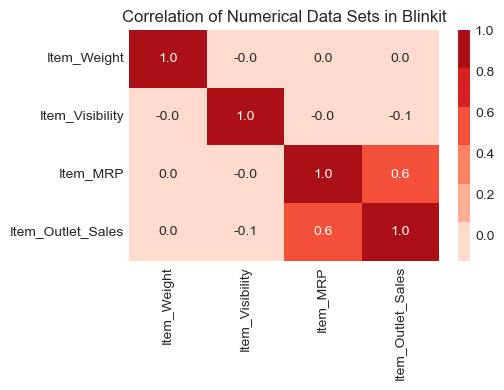

In [99]:
plt.figure(figsize=(5,3))
colormap = sns.color_palette("Reds") 
sns.heatmap(corr_mat,annot = True,cmap =colormap,fmt = '.1f')
plt.title('Correlation of Numerical Data Sets in Blinkit')
plt.show()

### Insights

The moderate <b>positive correlation (0.6)</b> between <b>Item_MRP and Item_Outlet_Sales</b> suggests that <b>pricing strategies significantly influence sales. </b> 

<b>Higher-priced</b> items may generate <b>more revenue</b>, possibly due to higher profit margins . 

The <b>weak negative correlation (-0.1)</b> between <b>Item_Visibility and Item_Outlet_Sales </b>hints that<b> increased visibility might slightly reduce sales</b>, though the effect is <b>minimal</b>.

This could suggest <b>overexposure or ineffective visibility strategies,</b> but the relationship is <b>too weak to draw firm conclusions without further investigation</b>